In [1]:
# 라이브러리 
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import seaborn as sns
# 한글폰트 불러오기
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# EDA

In [2]:
cate_name = '후드집업'
df = pd.read_csv('data/reviews/reviews_{}.csv'.format(cate_name)).set_index('Unnamed: 0')
df.head()

,review,review_headline,reviewer,prod_name,prod_id,prod_link,prod_star_score,prod_reg_date,attach_count,help_count,big_category_name,category_name,category_id,category_link
Unnamed: 0,,,,,,,,,,,,,,
0,캐럿 여성용 후드 플리스 자켓 L사이즈블랙 컬러 후기에요 ~평소에 캐럿 옷을 굉장...,따뜻한데 돌돌이질 필수~,트위스트킹,"캐럿 여성용 후드 플리스 자켓, L, 블랙",1592283662,https://www.coupang.com/vp/products/1592283662,4,2023.01.05,8,5,쿠팡 홈여성패션의류,후드집업/집업류,498724,NaN
1,스펙 : 160cm / 53키로주문한 제품 : S 블랙제조 : 2021.10 인도네...,따뜻해요. 추운날씨에 딱이에요. 가성비 굿.,전세계평화,"캐럿 여성용 후드 플리스 자켓, S, 블랙",1592283662,https://www.coupang.com/vp/products/1592283662,5,2022.10.14,10,48,쿠팡 홈여성패션의류,후드집업/집업류,498724,NaN
2,완전 뚱뚱해 보여요아직 한번도 못입었음흐물거려서 입을수가 없음!!!집안에서만 입을수...,"#핏이 뚱핏,빗바랜 검정색(초라해보임)따뜻하긴함 ~~~",손*여,"캐럿 여성용 후드 플리스 자켓, L, 블랙",1592283662,https://www.coupang.com/vp/products/1592283662,4,2021.02.02,8,40,쿠팡 홈여성패션의류,후드집업/집업류,498724,NaN
3,간단하게 위에 걸칠 외투가 필요해서 구매했어요.후리스는 너무추운겨울을 제외하고는 입...,NaN,해피니스87,"캐럿 여성용 후드 플리스 자켓, M, 아이보리",1592283662,https://www.coupang.com/vp/products/1592283662,3,2021.01.15,10,76,쿠팡 홈여성패션의류,후드집업/집업류,498724,NaN
4,보들보들 보드라운 느낌이 넘 좋아요!진짜 가성비 우수 원단이네용ㅎㅎㅎ집에서 보일러 ...,NaN,아리엘s2,"캐럿 여성용 후드 플리스 자켓, S, 블랙",1592283662,https://www.coupang.com/vp/products/1592283662,5,2020.12.30,5,23,쿠팡 홈여성패션의류,후드집업/집업류,498724,NaN


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20195 entries, 0 to 20194
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review             20195 non-null  object 
 1   review_headline    8996 non-null   object 
 2   reviewer           20194 non-null  object 
 3   prod_name          20195 non-null  object 
 4   prod_id            20195 non-null  int64  
 5   prod_link          20195 non-null  object 
 6   prod_star_score    20195 non-null  int64  
 7   prod_reg_date      20195 non-null  object 
 8   attach_count       20195 non-null  int64  
 9   help_count         20195 non-null  int64  
 10  big_category_name  20195 non-null  object 
 11  category_name      20195 non-null  object 
 12  category_id        20195 non-null  int64  
 13  category_link      0 non-null      float64
dtypes: float64(1), int64(5), object(8)
memory usage: 2.3+ MB
None


In [4]:
df['big_category_name'].unique()

array(['쿠팡 홈여성패션의류', '쿠팡 홈남성패션의류', '쿠팡 홈남여공용의류'], dtype=object)

help review max : 196
help review median : 0.0
help review mean : 1.8049517207229513
helpless review ratio (도움이 됐어요 0인 리뷰 비율) : 0.5177024015845506


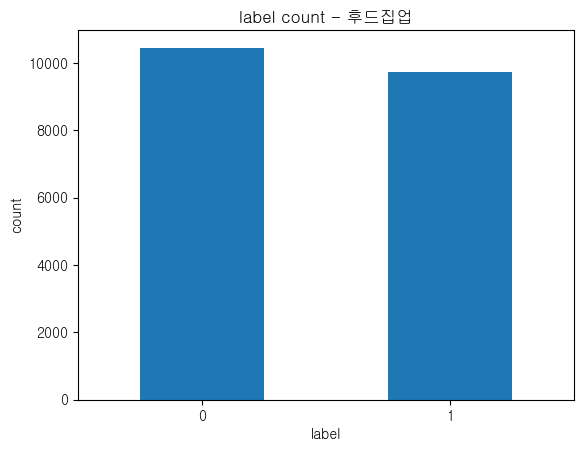

In [5]:
df['help_count'] = df['help_count'].astype(int)
print('help review max :',max(df['help_count']))
print('help review median :',np.median(df['help_count']))
print('help review mean :',np.mean(df['help_count']))
print('helpless review ratio (도움이 됐어요 0인 리뷰 비율) :',sum(df['help_count'] == 0)/df.shape[0])

df['label'] = df['help_count'] > 0
df['label'] = df['label'].astype(int)
df['label'].value_counts().plot(kind='bar',rot=0)
plt.xlabel('label')
plt.ylabel('count')
plt.title(f'label count - {cate_name}')
plt.show()

In [80]:
# 라벨 저장
df.to_csv('data/review_label/review_label_{}.csv'.format(cate_name))

##### 워드클라우드


konlpy 패키지를 통한 한글 텍스트 추출 및 간단한 전처리

In [6]:
okt = Okt()

text = []
for i in df['review']:
    text.append(i)
text = ''.join(text)

nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

한글로 워드클라우드 시각화

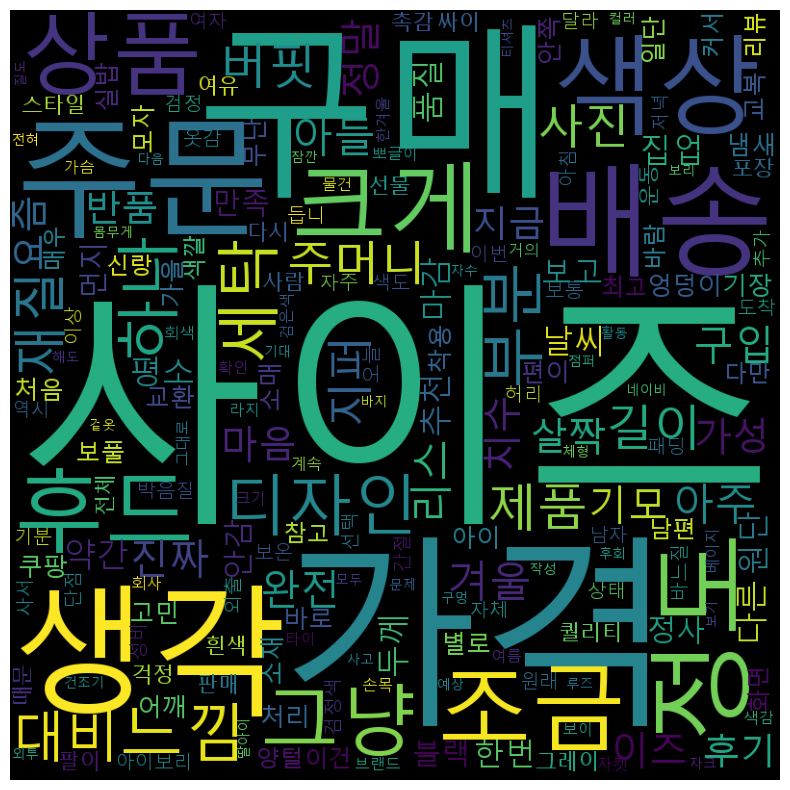

In [7]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(gen)
plt.show()

### feature engineering

[중요 특성]
- 리뷰 길이
- 첨부사진 개수

[중요하지 않은 특성]
- 제목여부
- 별점

In [8]:
df['review_length'] = [len(review) for review in df['review']]
df['is_headline'] = df['review_headline'].isnull()

In [9]:
helpful_review = df[df['label'] > 0]
helpless_review = df[df['label'] == 0]
helpful_review.shape[0], helpless_review.shape[0]

(9740, 10455)

In [10]:
# 리뷰길이
print('전체 리뷰 : {}'.format(np.mean(df['review_length'])))
print('helpful 리뷰 : {}'.format(np.mean(helpful_review['review_length'])))
print('helpless 리뷰 : {}'.format(np.mean(helpless_review['review_length'])))
print('평균 차이 : {}'.format(np.mean(helpful_review['review_length']) - np.mean(helpless_review['review_length'])))

전체 리뷰 : 72.33869769744986
helpful 리뷰 : 98.67720739219712
helpless 리뷰 : 47.80143472022956
평균 차이 : 50.87577267196756


In [11]:
# 첨부파일 개수
print('전체 리뷰 : {}'.format(np.mean(df['attach_count'])))
print('helpful 리뷰 : {}'.format(np.mean(helpful_review['attach_count'])))
print('helpless 리뷰 : {}'.format(np.mean(helpless_review['attach_count'])))
print('평균 차이 : {}'.format(np.mean(helpful_review['attach_count']) - np.mean(helpless_review['attach_count'])))

전체 리뷰 : 0.3613765783609804
helpful 리뷰 : 0.5545174537987679
helpless 리뷰 : 0.18144428503108562
평균 차이 : 0.3730731687676823


In [12]:
# 제목여부 개수
print('전체 리뷰 : {}'.format(np.mean(df['is_headline'])))
print('helpful 리뷰 : {}'.format(np.mean(helpful_review['is_headline'])))
print('helpless 리뷰 : {}'.format(np.mean(helpless_review['is_headline'])))
print('평균 차이 : {}'.format(np.mean(helpful_review['is_headline']) - np.mean(helpless_review['is_headline'])))

전체 리뷰 : 0.5545432037633078
helpful 리뷰 : 0.5131416837782341
helpless 리뷰 : 0.5931133428981349
평균 차이 : -0.07997165911990078


In [13]:
# 별점
print('전체 리뷰 : {}'.format(np.mean(df['prod_star_score'])))
print('helpful 리뷰 : {}'.format(np.mean(helpful_review['prod_star_score'])))
print('helpless 리뷰 : {}'.format(np.mean(helpless_review['prod_star_score'])))
print('평균 차이 : {}'.format(np.mean(helpful_review['prod_star_score']) - np.mean(helpless_review['prod_star_score'])))

전체 리뷰 : 4.165882644218866
helpful 리뷰 : 4.12741273100616
helpless 리뷰 : 4.201721664275467
평균 차이 : -0.07430893326930654


##### 상관관계

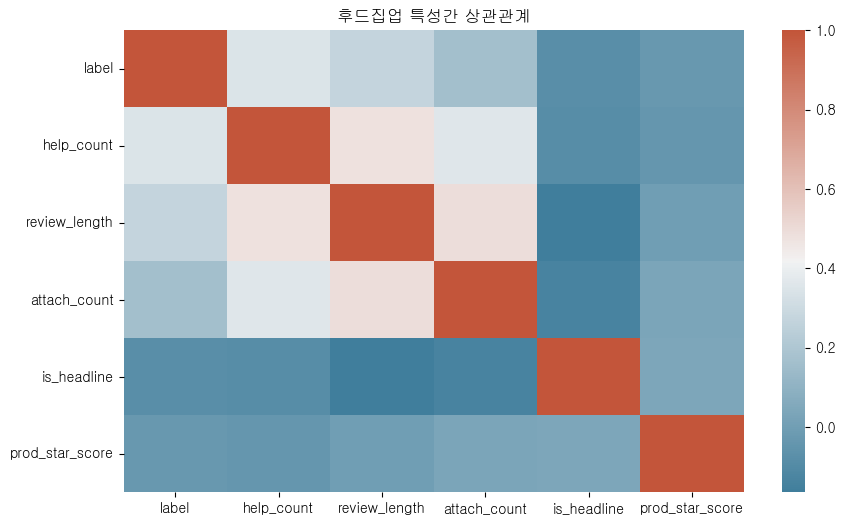

In [14]:
plt.figure(figsize=(10,6))
corr = df[['label','help_count','review_length','attach_count','is_headline','prod_star_score']].corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap=cmap)
plt.title('{} 특성간 상관관계'.format(cate_name))
plt.show()

리뷰길이(review_length)와 첨부파일개수(attach_count)가 상대적으로 높은 상관관계를 보이고 있다.

---